In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial import distance
from seaborn import heatmap
from random import randint
from scipy.spatial import distance

class KMeans(object):
    # K is the K in KMeans
    def __init__(self, K):
        self.K = K
        
    # X is a (N x 28 x 28) array where 28x28 is the dimensions of each of the N images.
    def find_nearest(self,point):
        return np.argmin([distance.euclidean(point, centroid) for centroid in self.centroids])

    def centroids_changing(self):
        for i,centroid in enumerate(self.centroids):
            if any(self.previous_centroids[i]!=centroid):
                return True
        return False

    def calculate_rss(self):
        return np.mean([np.mean([distance.euclidean(point, self.centroids[i]) for point in cluster]) 
        for i,cluster in enumerate(self.clusters)])
                
        
    def fit(self, X_train):
        self.X=X_train
        
#         Randomly picking centroids
        self.centroids=[self.X[randint(0,len(self.X))] for k in range(self.K)]
        iteration=0
        
        rss_iteration=[]
        while iteration==0 or self.centroids_changing():
    #         assign each point to its nearest cluster
            self.clusters=[[] for k in range(self.K)]
            for point in self.X:
                nearest_centroid=self.find_nearest(point)
                self.clusters[nearest_centroid].append(point)
            self.clusters=np.array(self.clusters)

    #         recalculating and updating the centroids 
            self.previous_centroids=self.centroids
            self.centroids=[np.mean(cluster, axis = 0) for cluster in self.clusters]
            iteration+=1
            rss_iteration.append(self.calculate_rss())
#         plt.figure()
#         plt.imshow(centroid.reshape(28,28), cmap='Greys_r')
#         plt.show()
        
    # This should return the arrays for K images. Each image should represent the mean of each of the fitted clusters.
    def get_mean_images(self):
        for centroid in self.centroids:
            plt.figure()
            plt.imshow(centroid.reshape(28,28), cmap='Greys_r')
            plt.show()

large_dataset = np.load("data/large_dataset.npy")
K = 10
KMeansClassifier = KMeans(K=10)
KMeansClassifier.fit(large_dataset)


In [ ]:
# This is how to plot an image. We ask that any images in your writeup be grayscale images, just as in this example.

fig = plt.figure()
KMeansClassifier = KMeans(10)
idx=1
for row in range(5):
    KMeansClassifier.fit(large_dataset)
    for column,centroid in enumerate(KMeansClassifier.centroids):
        ax = fig.add_subplot(10, 5, idx)
        idx+=1
        ax.imshow(centroid.reshape(28,28), cmap='Greys_r')
fig.show()
fig.savefig('test.png')

In [ ]:
standardized_data=np.empty((large_dataset.shape[0],large_dataset.shape[1]))
for pixel in range(large_dataset.shape[1]):
    mean=np.mean(large_dataset[:,pixel])
    std=np.std(large_dataset[:,pixel])
    for i,pic in enumerate(large_dataset):
        if std!=0:
            standardized_data[i,pixel]=(pic[pixel]-mean)/std
        else: 
            standardized_data[i,pixel]=(pic[pixel]-mean)


In [ ]:
fig = plt.figure()
KMeansClassifier = KMeans(10)
idx=1
for row in range(5):
    KMeansClassifier.fit(standardized_data)
    for column,centroid in enumerate(KMeansClassifier.centroids):
        ax = fig.add_subplot(10, 5, idx)
        idx+=1
        ax.imshow(centroid.reshape(28,28), cmap='Greys_r')
fig.show()
fig.savefig('StandardizedData.png')

299 298 297 296 295 294 293 292 291 290 289 288 287 286 285 284 283 282 281 280 279 278 277 276 275 274 273 272 271 270 269 268 267 266 265 264 263 262 261 260 259 258 257 256 255 254 253 252 251 250 249 248 247 246 245 244 243 242 241 240 239 238 237 236 235 234 233 232 231 230 229 228 227 226 225 224 223 222 221 220 219 218 217 216 215 214 213 212 211 210 209 208 207 206 205 204 203 202 201 200 199 198 197 196 195 194 193 192 191 190 189 188 187 186 185 184 183 182 181 180 179 178 177 176 175 174 173 172 171 170 169 168 167 166 165 164 163 162 161 160 159 158 157 156 155 154 153 152 151 150 149 148 147 146 145 144 143 142 141 140 139 138 137 136 135 134 133 132 131 130 129 128 127 126 125 124 123 122 121 120 119 118 117 116 115 114 113 112 111 110 109 108 107 106 105 104 103 102 101 100 99 98 97 96 95 94 93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


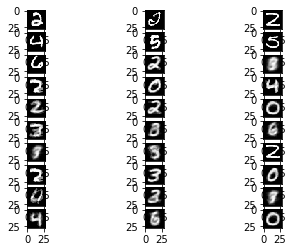

In [36]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial import distance
from seaborn import heatmap
from random import randint



class HAC(object):
    def __init__(self,linkage):
        self.linkage=linkage
    
    def find_closest_pair(self):
        min_row,min_col,min_element=-1,-1,float('inf')
        for i,row in enumerate(self.clusters_matrix):
            for j,cell in enumerate(row):
                if cell<min_element and i!=j:
                    min_row,min_col,min_element=i,j,cell
        return min_row,min_col,min_element  

    def merge_clusters(self,cls_one,cls_two):
        row_one=self.clusters_matrix[cls_one]
        row_two=self.clusters_matrix[cls_two]        
        combined_cluster=[]
        for i in range(len(row_one)):
            if i!=cls_one and i!=cls_two:
                if self.linkage=='min':
                    combined_cluster.append(min(row_one[i],row_two[i]))
                elif self.linkage=='max':
                    combined_cluster.append(max(row_one[i],row_two[i]))
                elif self.linkage=='centroid':
                    combined_cluster.append((row_one[i]+row_two[i])/2)                    
        merged_cluster=np.array(combined_cluster).reshape(len(combined_cluster),1)
        return merged_cluster
        
    def fit(self, X):
        self.X=X
        self.clusters_matrix= distance.cdist(self.X,self.X)
        self.level_clusters_dict={len(self.X):[[datum] for datum in self.X]}
        self.combination_similarities=[]
        
        while len(self.clusters_matrix)>1:
            # find the two closest clusters(clusters_matrix)
            cluster_one,cluster_two,comb_sim= self.find_closest_pair()
            self.combination_similarities.append(comb_sim)
            # merging the two clusters 
            new_cluster= self.merge_clusters(cluster_one, cluster_two)
            # remove cluster_one and cluster_two from matrix
            first_cluster,second_cluster=max(cluster_one,cluster_two), min(cluster_one,cluster_two)
            self.clusters_matrix=np.delete(self.clusters_matrix,first_cluster,axis=0)
            self.clusters_matrix=np.delete(self.clusters_matrix,first_cluster,axis=1)            
            self.clusters_matrix=np.delete(self.clusters_matrix,second_cluster,axis=0)
            self.clusters_matrix=np.delete(self.clusters_matrix,second_cluster,axis=1)

            #add new_cluster to matrix as a row  
            self.clusters_matrix=np.concatenate((self.clusters_matrix,new_cluster),axis=1)
            
            #add new_cluster to matrix as a clumn      
            new_cluster=np.append(new_cluster,0)
            new_cluster=new_cluster.reshape(len(new_cluster),1).T
            self.clusters_matrix=np.concatenate((self.clusters_matrix,new_cluster),axis=0)
            level=len(self.clusters_matrix)
            self.level_clusters_dict[level]=[cluster for i,cluster in enumerate(self.level_clusters_dict[level+1]) 
                                            if i!=cluster_one and i!=cluster_two]
            self.level_clusters_dict[level].append(self.level_clusters_dict[level+1][cluster_one]+
                                                  self.level_clusters_dict[level+1][cluster_two])
            
            print(len(self.clusters_matrix),end=' ')
    
    def get_centroids(self,k):
        return [np.mean(cluster,axis=0) for cluster in self.level_clusters_dict[k]] 

small_dataset = np.load("data/small_dataset.npy")
small_labels = np.load("data/small_dataset_labels.npy").astype(int)

hac_models=[]
hac_models.append(HAC('min'))
hac_models.append(HAC('max'))
hac_models.append(HAC('centroid'))

fig = plt.figure()
idx=1
for model in hac_models:
    model.fit(small_dataset)
    for centroid in model.get_centroids(k=10):
        ax = fig.add_subplot(10, 3, idx)
        ax.tick_params(axis='both', which='minor', labelsize=4)
        ax.imshow(centroid.reshape(28,28), cmap='Greys_r')
        idx+=1
        
fig.show()
fig.savefig('test.png')    


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


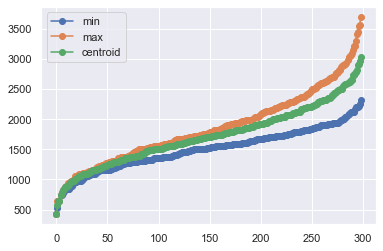

In [113]:
fig = plt.figure()
for model in hac_models:
    plt.plot(range(len(model.combination_similarities)),model.combination_similarities, '-o')
plt.legend(['min','max','centroid'])
fig.show()
fig.savefig('part5.png')

In [80]:
labels=np.load("data/small_dataset_labels.npy")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


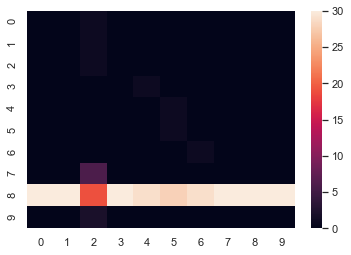

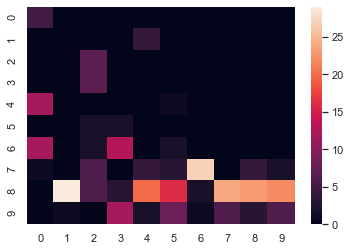

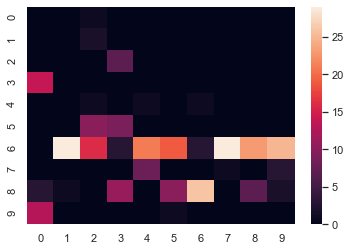

In [111]:
import seaborn as sns; sns.set()

for o,model in enumerate(hac_models):
    fig = plt.figure()
    cluster_lable=np.zeros((10,10))
    for i,datum in enumerate(model.X):
        for j,cluster in enumerate(model.level_clusters_dict[10]):
            if any([all(datum==datapoint) for datapoint in cluster]):
                cluster_lable[j,int(labels[i])]+=1
    ax = sns.heatmap(cluster_lable)
    fig.savefig('HAC_Heatmap_'+str(o)+'.png')     
    fig.show()

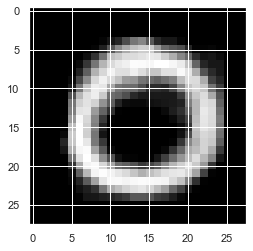

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


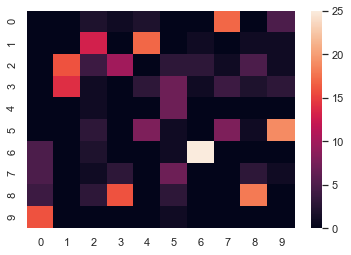

In [112]:
kmean_model=KMeans(10)
kmean_model.fit(small_dataset)

fig = plt.figure()
cluster_lable=np.zeros((10,10))
for i,datum in enumerate(model.X):
    for j,cluster in enumerate(kmean_model.clusters):
        if any([all(datum==datapoint) for datapoint in cluster]):
            cluster_lable[j,int(labels[i])]+=1
ax = sns.heatmap(cluster_lable)
fig.savefig('kmean_Heatmap.png')     
fig.show()